# CS274 Project - Concurrent AVL Implementation
### Gabriel Siqueira and Yanju Chen

## Sequential Implementation

In [1]:
from pyAVL import AVL

seqTree = AVL()

### Inserts

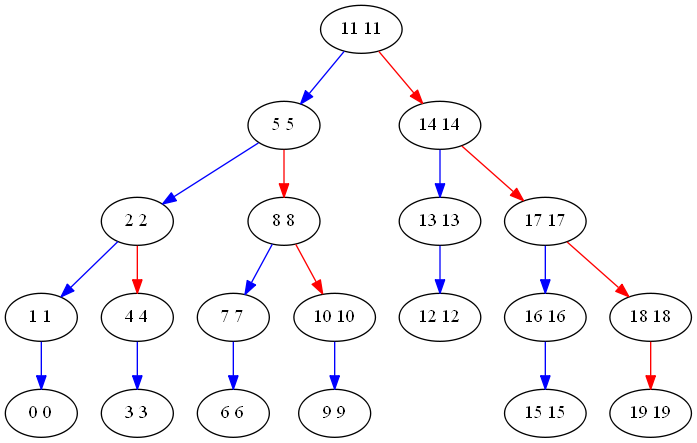

In [2]:
for i in range(20):
    seqTree.put(i)
    
seqTree.print()

### Updates

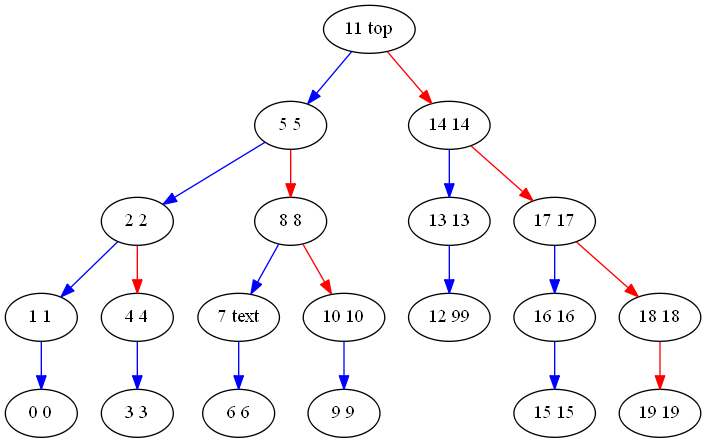

In [3]:
seqTree.put(12, "99")
seqTree.put(7, "text")
seqTree.put(11, "top")

seqTree.print()

### Removals

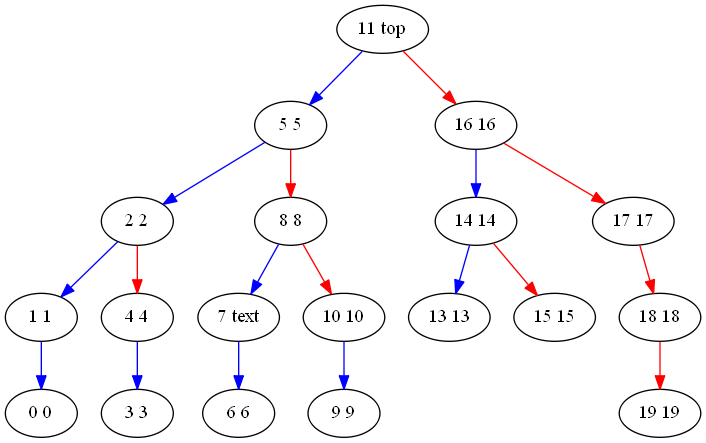

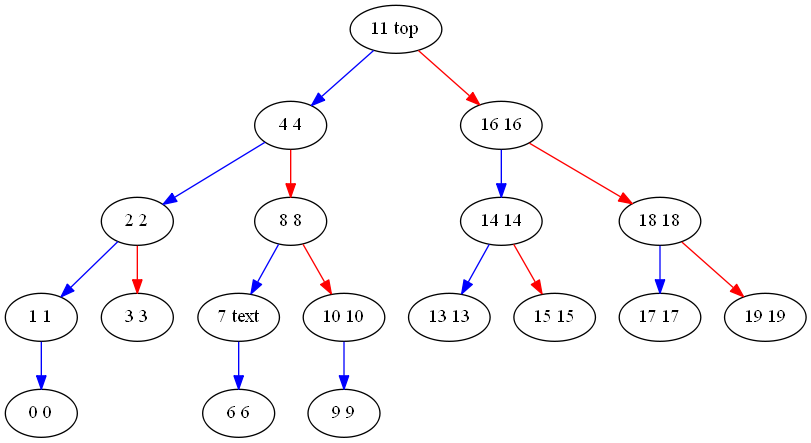

In [4]:
seqTree.remove(12)
seqTree.print()
seqTree.remove(5)
seqTree.print()

### What if we want it faster, can we use concurrency?

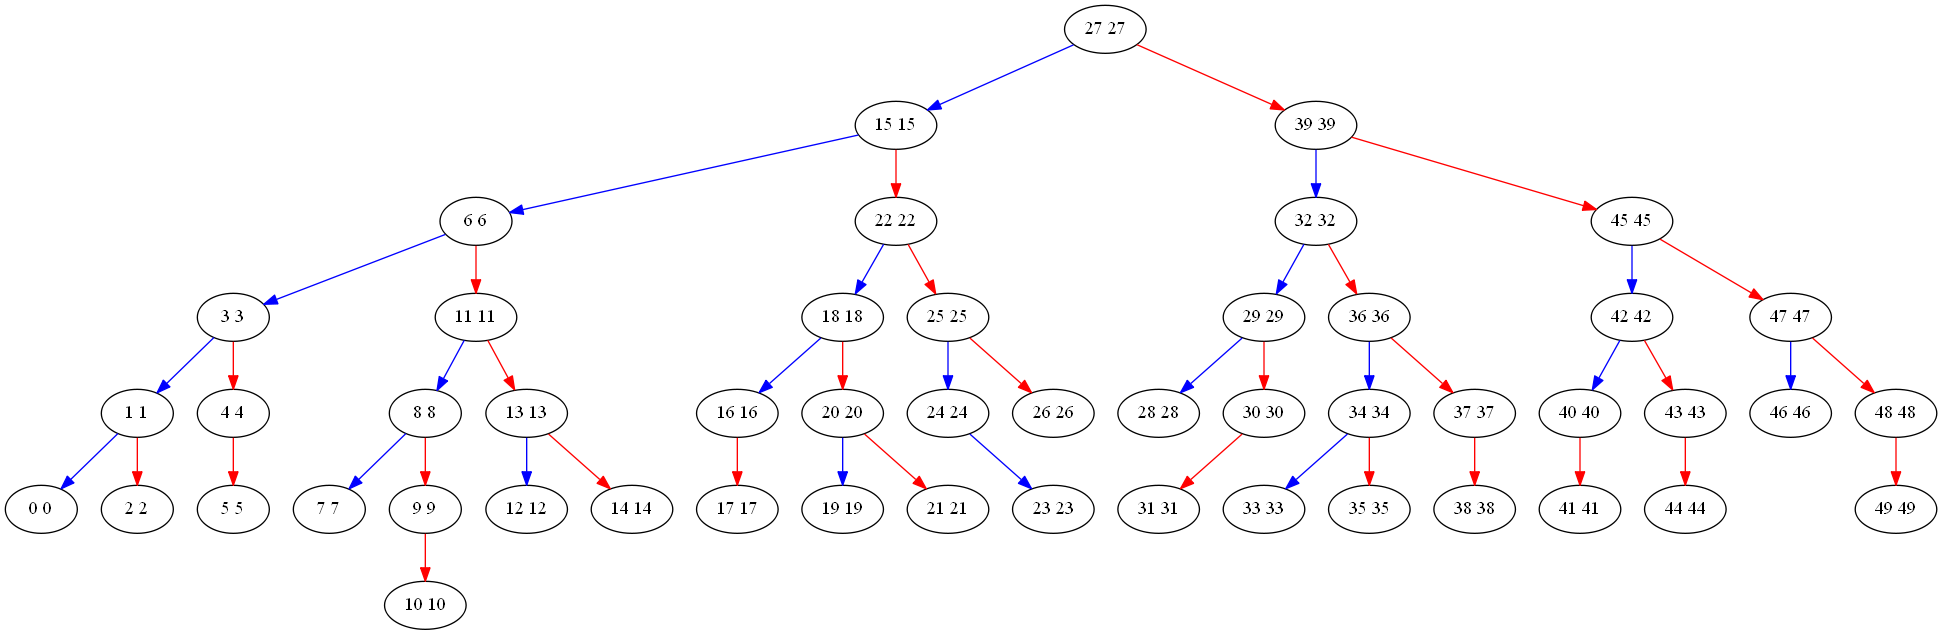

In [5]:
import random
import threading

def insert(l, tree):
    for i in l:
        tree.put(i)

ltp = random.sample(list(range(50)),k=50)

seqTree = AVL()
tpool = []
for i in range(5):
    tpool.append(threading.Thread(target=insert,args=(ltp[i*10:(i+1)*10],seqTree)))
for i in range(5):
    tpool[i].start()
for i in range(5):
    tpool[i].join()
seqTree.print()

### As we just saw, the sequential AVL implementation doesn't support concurrency. We tried using multiple threads to speed up out tree operations but many nodes were lost. The three itself wasn't left in an inconsistent state but our code ran into errors and lost a lot of information.

## Concurrent Implementation

In [6]:
from pyConAVL import ConAVL

conTree = ConAVL()

### Concurrent inserts now work well!

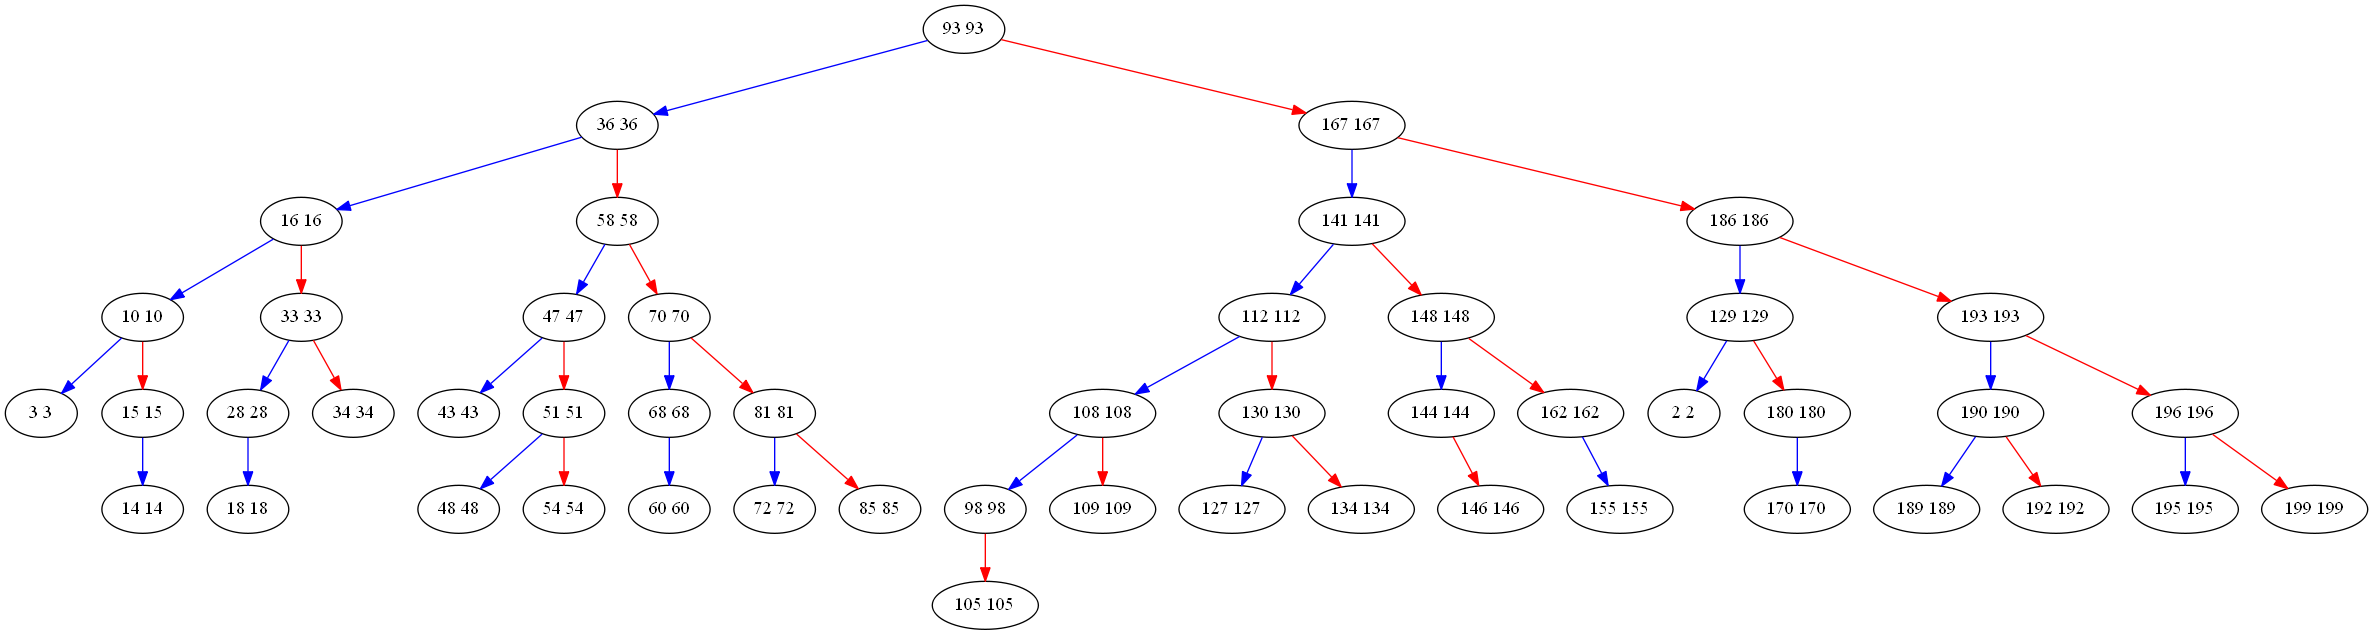

In [7]:
def insert(l, tree):
    for i in l:
        tree.put(i)

ltp = random.sample(list(range(200)),k=200)

conTree = ConAVL(simulate=True)
tpool = []
for i in range(5):
    tpool.append(threading.Thread(target=insert,args=(ltp[i*10:(i+1)*10],conTree)))
for i in range(5):
    tpool[i].start()
for i in range(5):
    tpool[i].join()
conTree.print()

### Now, is that really faster?

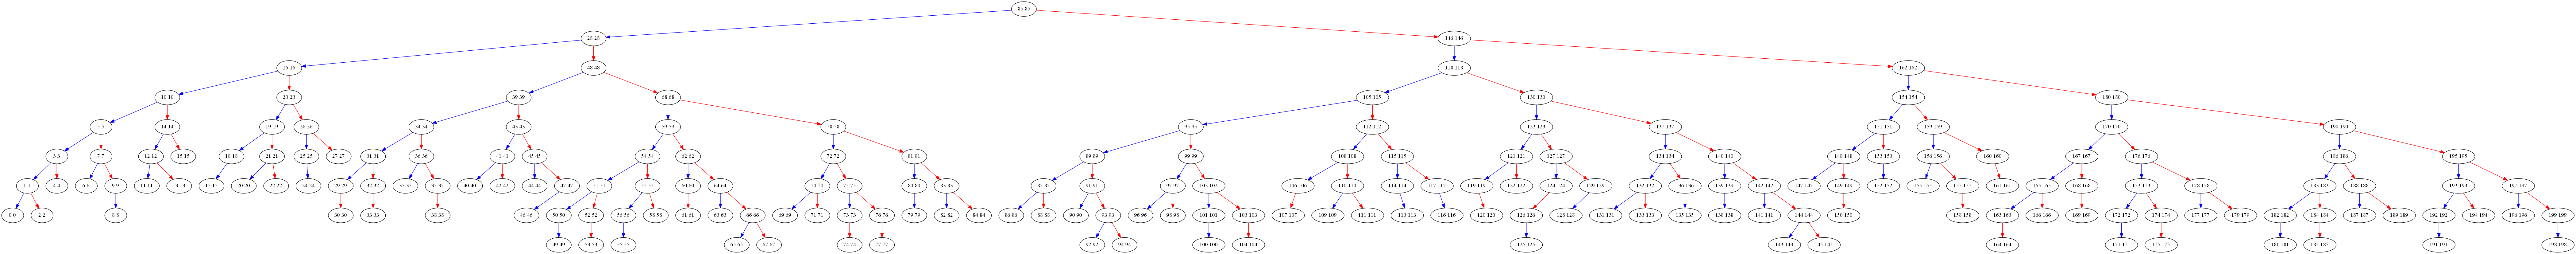

Sequential time: 0.010901978751758164


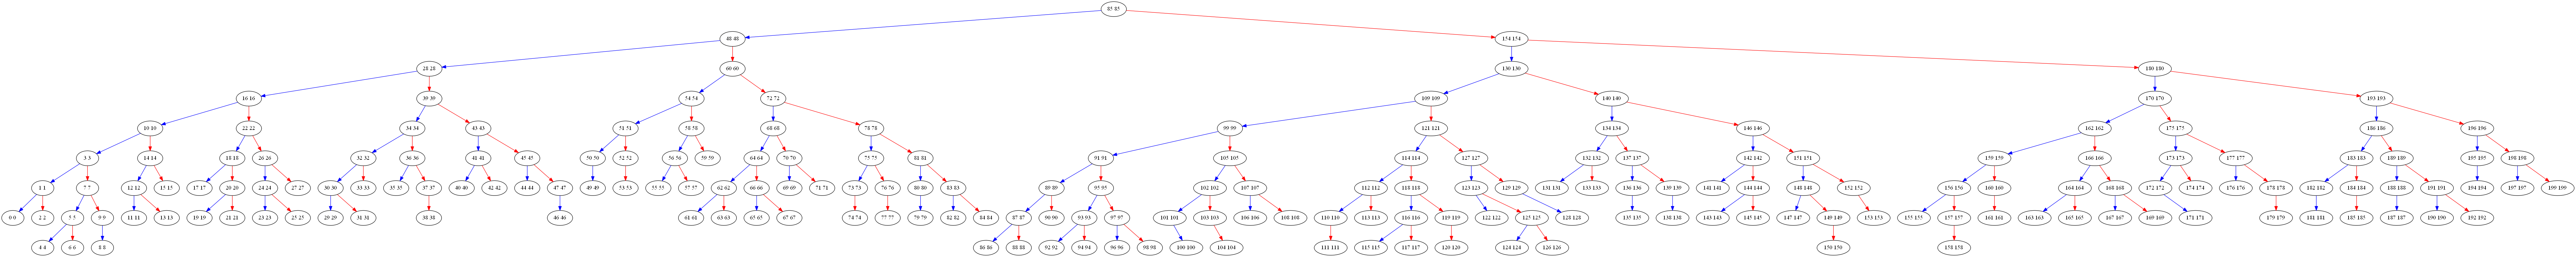

Concurrent time: 0.006743389586407311


In [8]:
import time

seqTree = AVL()
conTree = ConAVL()

tot = 0
for i in range(10):
    seqTree = AVL()
    start = time.clock()
    for item in ltp:
        seqTree.put(item)
    stop = time.clock()
    tot += stop-start
    
seqTree.print()
print("Sequential time: %s" % (tot/10))

tot = 0
for i in range(10):
    conTree = ConAVL()
    tpool = []
    start = time.clock()
    for i in range(10):
        tpool.append(threading.Thread(target=insert,args=(ltp[i*20:(i+1)*20],conTree)))
    for i in range(10):
        tpool[i].start()
    for i in range(10):
        tpool[i].join()
    stop = time.clock()
    tot += stop-start
conTree.print()
print("Concurrent time: %s" % (tot/10))